In [6]:
#import libaries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [8]:
# Sample dataset creation

In [11]:
data = {
    'X1 transaction date': [2012, 2013, 2012, 2013, 2012],
    'X2 house age': [32.0, 25.0, 18.0, 15.0, 10.0],
    'X3 distance to the nearest MRT station': [84.87882, 306.59470, 561.98450, 2175.0300, 623.47310],
    'X4 number of convenience stores': [10, 9, 5, 3, 7],
    'Y house price of unit area': [37.9, 42.2, 47.3, 54.8, 48.5]
}


In [12]:
# Convert to DataFrame

In [13]:
df = pd.DataFrame(data)

In [14]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2013,25.0,306.59470,9,42.2
2,2012,18.0,561.98450,5,47.3
3,2013,15.0,2175.03000,3,54.8
4,2012,10.0,623.47310,7,48.5


In [15]:
df.shape

(5, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     5 non-null      int64  
 1   X2 house age                            5 non-null      float64
 2   X3 distance to the nearest MRT station  5 non-null      float64
 3   X4 number of convenience stores         5 non-null      int64  
 4   Y house price of unit area              5 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 332.0 bytes


In [39]:
#drop


In [40]:
df.drop(['X1 transaction date','X3 distance to the nearest MRT station'],axis = 1 )

,X2 house age,X4 number of convenience stores,Y house price of unit area
0,32.0,10,37.9
1,25.0,9,42.2
2,18.0,5,47.3
3,15.0,3,54.8
4,10.0,7,48.5


In [32]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

In [33]:
df.isna().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
Y house price of unit area                0
dtype: int64

In [21]:
#feature

In [34]:
x = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores'	]]	
x

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2013,25.0,306.59470,9
2,2012,18.0,561.98450,5
3,2013,15.0,2175.03000,3
4,2012,10.0,623.47310,7


In [23]:
#label

In [35]:
y = df['Y house price of unit area']
y

0    37.9
1    42.2
2    47.3
3    54.8
4    48.5
Name: Y house price of unit area, dtype: float64

In [26]:
#train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [37]:
xtest

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
1,2013,25.0,306.5947,9
4,2012,10.0,623.4731,7


In [38]:
ytest

1    42.2
4    48.5
Name: Y house price of unit area, dtype: float64

In [80]:
xtest.shape

(2, 35)

In [81]:
ytest.shape

(2,)

In [41]:
#check for correlation

In [42]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000e+00,-3.005948e-14,0.542798,-0.255031,0.335099
X2 house age,-3.005948e-14,1.000000e+00,-0.550723,0.708032,-0.846075
X3 distance to the nearest MRT station,5.427981e-01,-5.507229e-01,1.000000,-0.868597,0.898225
X4 number of convenience stores,-2.550307e-01,7.080322e-01,-0.868597,1.000000,-0.944592
Y house price of unit area,3.350988e-01,-8.460753e-01,0.898225,-0.944592,1.000000


In [43]:
#plot the correlation

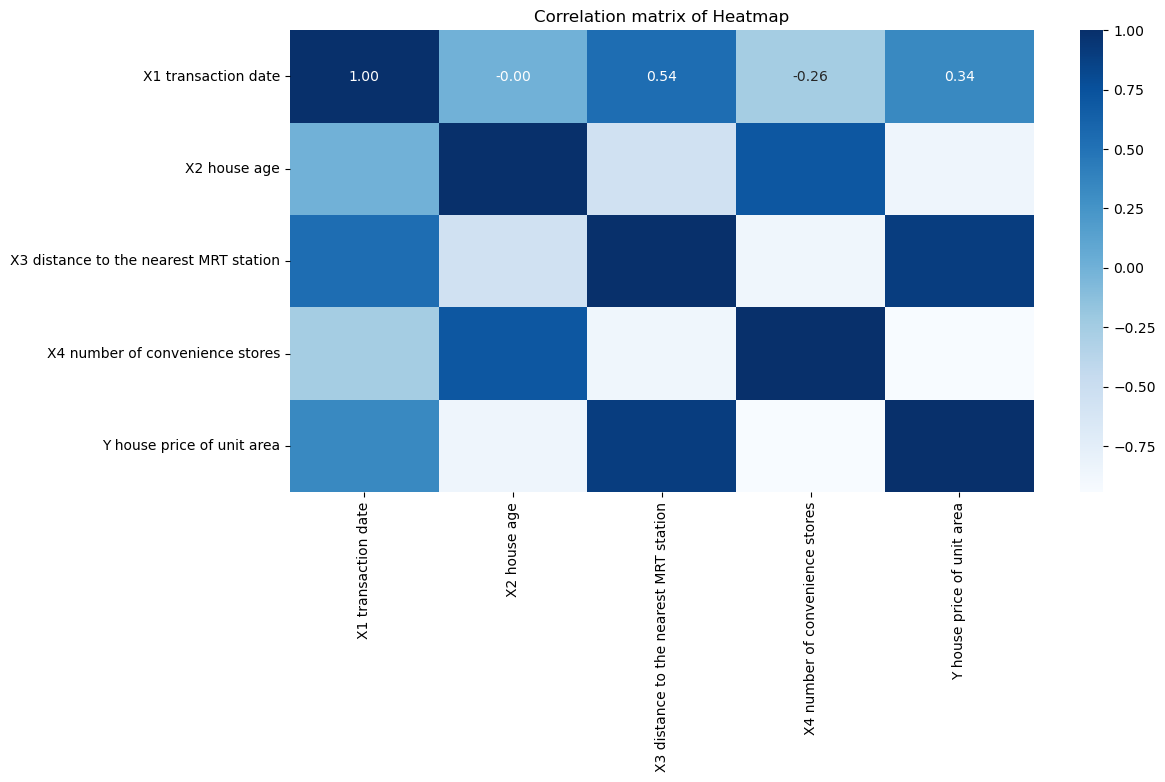

In [79]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True,fmt = '.2f',cmap = 'Blues')
plt.title('Correlation matrix of Heatmap')
plt.show()

In [47]:
#Apply linear regression

In [48]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [51]:
#prediction

In [53]:
y_pred = model.predict(xtest)

In [54]:
#Apply polynomial regression

In [55]:
poly_feature = PolynomialFeatures(degree = 3)
xtrain = poly_feature.fit_transform(xtrain)
xtest =  poly_feature.transform(xtest)

In [56]:
#fit the model


In [60]:
poly_model = LinearRegression()
poly_model.fit(xtrain,ytrain)

LinearRegression()

In [58]:
#predictions

In [59]:
y_pred1 = poly_model.predict(xtest)

In [62]:
# Evaluate model performance of linear regression

In [65]:
linear_mse = mean_squared_error(ytest,y_pred)


In [66]:
linear_score = r2_score(ytest,y_pred)


In [67]:
print(f'Mean Squared Error:{linear_mse:.2f}')
print(f'R Squared Score:{linear_score:.2f}')


Mean Squared Error:3.44
R Squared Score:0.65


In [68]:
# Evaluate model performance of linear regression

In [69]:
polynomial_mse = mean_squared_error(ytest,y_pred1)

In [70]:
polynomial_score = r2_score(ytest,y_pred1)

In [71]:
print(f'Mean Squared Error:{polynomial_mse:.2f}')
print(f'R Squared Score:{polynomial_score:.2f}')

Mean Squared Error:0.03
R Squared Score:1.00


In [72]:
# Linear Regression Plot

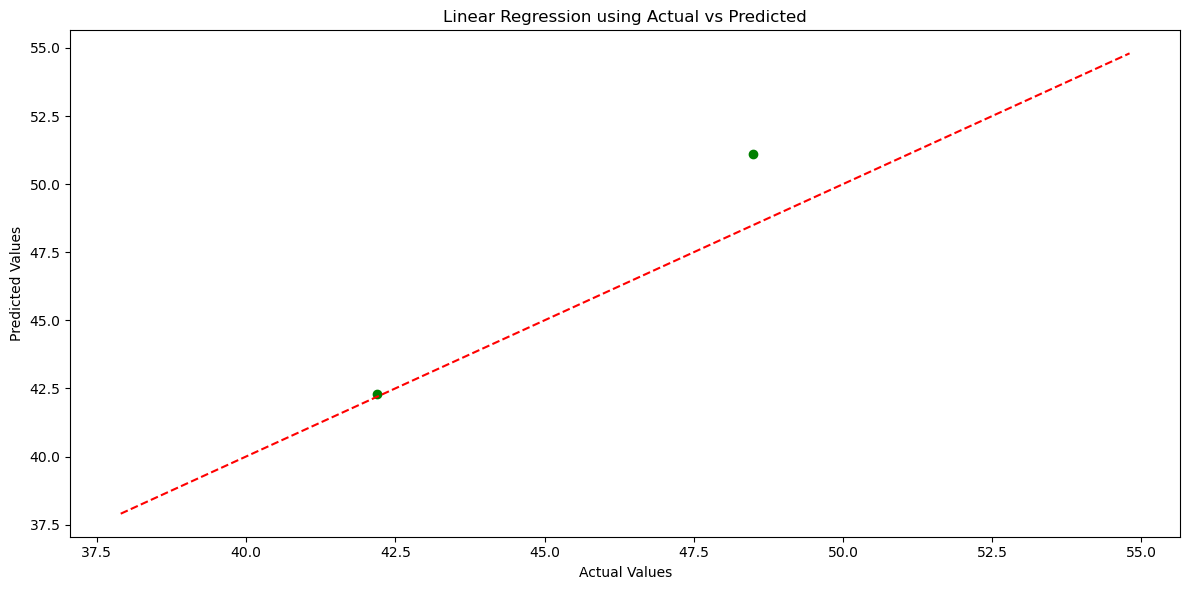

In [83]:
plt.figure(figsize=(12, 6))
plt.scatter(ytest, y_pred, color='g')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression using Actual vs Predicted')
plt.tight_layout()
plt.show()



In [75]:
# Polynomial Regression Plot

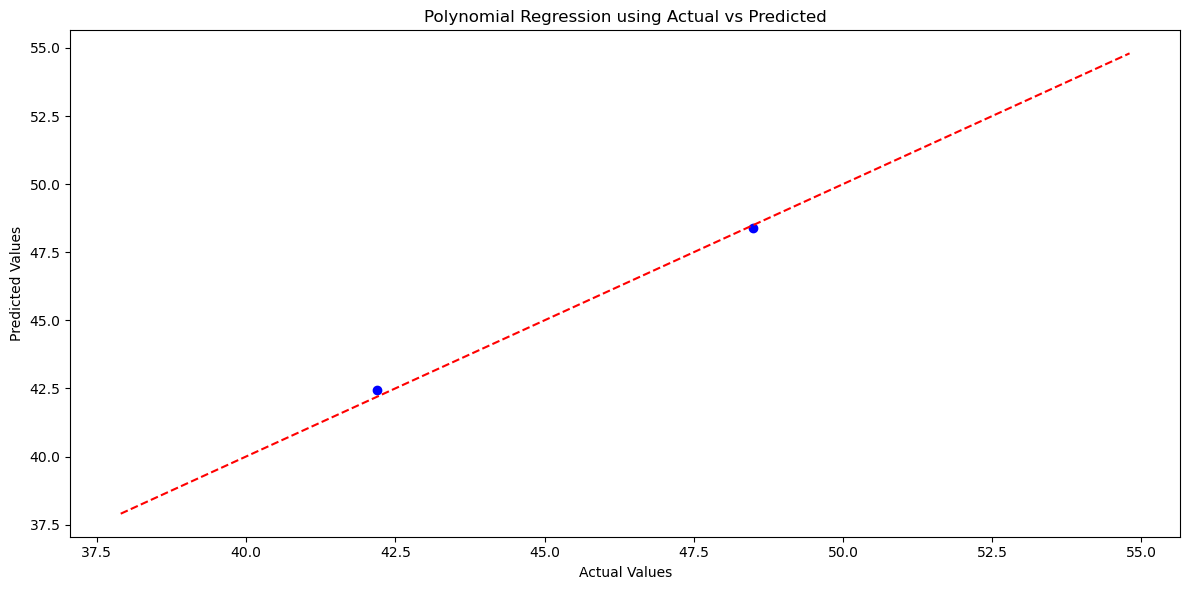

In [82]:
plt.figure(figsize=(12, 6))
plt.scatter(ytest, y_pred1, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression using Actual vs Predicted')
plt.tight_layout()
plt.show()
